In [1]:
#this program will only work zumi python library 1.2
#TODO: Need to fix the index since i added mpu temp to 17; shift everything
from zumi.zumi import Zumi
from zumi.util.screen import Screen
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import time
import IPython.display

zumi = Zumi()
zumi.reset_gyro()

zumi.MIN_I2C_DELAY = 0.0
zumi.MAX_USER_SPEED = 127

def column(column_number, matrix):
    return [row[column_number] for row in matrix]

def save_data(sensor_list,file_name="data.txt",append=True):
    message = ""
    print("saving data")
    if append==True:
        file = open(file_name, "a")
    else:
        file = open(file_name, "w")
    for val in sensor_list:
        for data_point in val:
            message = message + str(data_point) + " "
        message = message + "\n"
    file.write(message)
    file.close()
    print("done saving data")

Starting Zumi 
Pi Zero I2C is available
Verified Pi Zero is the same
Gyroscope previously calibrated
Zumi board detected
Compass detected
OLED Screen detected
Gyroscope & Accelerometer detected


In [2]:
zumi.mpu.calibrate_MPU(100)
zumi.reset_gyro()

time_out = 5
time_passed = 0
sensor_list = []

print("starting")

init_time = time.time()
while(time_passed <= time_out):
    current_time = time.time()
    time_passed = current_time-init_time
    sensor_list.append(zumi.get_all_sensor_data())

print("done")
save_data(sensor_list)

Creating new offset file...
.
.
starting
done
saving data
done saving data


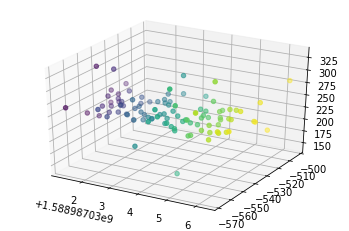

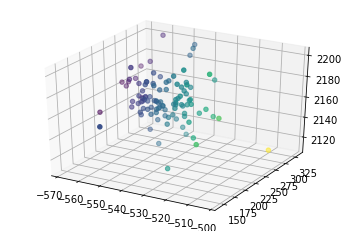

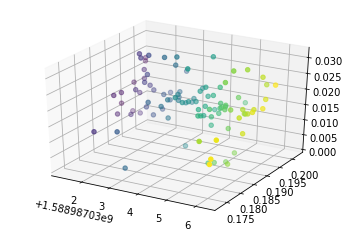

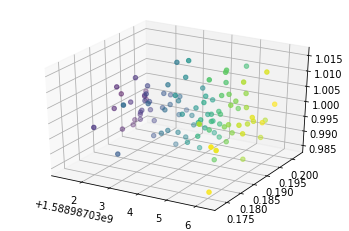

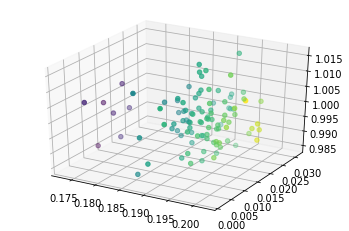

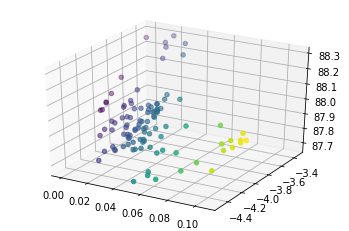

In [3]:
from mpl_toolkits.mplot3d import Axes3D

x = column(29,sensor_list)
y = column(30,sensor_list)
z = column(31,sensor_list)
t = column(0,sensor_list)
xa =column(11,sensor_list)
ya =column(12,sensor_list)
za =column(13,sensor_list)
xr =column(25,sensor_list)
yr =column(26,sensor_list)
zr =column(27,sensor_list)

fig= plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(t,x,y,c=t)
plt.show()

fig= plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(x,y,z,c=x)
plt.show()

fig= plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(t,xa,ya,c=t)
plt.show()

fig= plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(t,xa,za,c=t)
plt.show()

fig= plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(xa,ya,za,c=xa)
plt.show()

fig= plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(xr,yr,zr,c=xr)
plt.show()

In [4]:
def graph_everything():
    val_alpha = 0.2
    #0 time elapsed
    #1-6 ir sensors
    plt.plot(column(0,sensor_list),column(1,sensor_list),'bo',
             column(0,sensor_list),column(2,sensor_list),'yo',
             column(0,sensor_list),column(3,sensor_list),'ro',
             column(0,sensor_list),column(4,sensor_list),'go',
             column(0,sensor_list),column(5,sensor_list),'mo',
             column(0,sensor_list),column(6,sensor_list),'ko',alpha=val_alpha)
    plt.ylabel('ir sensors')
    plt.xlabel('time')
    plt.show()

    #7 battery
    #8 vcc rail
    #9 version
    #10 user defined
    plt.plot(column(0,sensor_list),column(7,sensor_list),'go',
             column(0,sensor_list),column(8,sensor_list),'bo',)
    plt.ylabel('batt and vcc')
    plt.xlabel('time')
    plt.show()


    # print("x acc ",temp_data[11])
    # print("y acc ",temp_data[12])
    # print("z acc ",temp_data[13])


    #11 acc x
    #12 acc y
    #13 acc z
    plt.plot(column(0,sensor_list),column(11,sensor_list),'co',
             column(0,sensor_list),column(12,sensor_list),'mo',
             column(0,sensor_list),column(13,sensor_list),'ko',)
    plt.ylabel('acceleration')
    plt.xlabel('time')
    plt.show()

    #11 acc x
    #12 acc y
    #13 acc z
    plt.plot(column(11,sensor_list),column(12,sensor_list),'co',alpha=val_alpha)
    plt.ylabel('acceleration y')
    plt.xlabel('acceleration x')
    plt.show()


    plt.plot(column(11,sensor_list),column(13,sensor_list),'ko',alpha=val_alpha)
    plt.ylabel('acceleration z')
    plt.xlabel('acceleration x')
    plt.show()

    plt.plot(column(12,sensor_list),column(13,sensor_list),'mo',alpha=val_alpha)
    plt.ylabel('acceleration z')
    plt.xlabel('acceleration y')
    plt.show()


    #14 angv x
    #15 angv y
    #16 angv z
    plt.plot(column(0,sensor_list),column(14,sensor_list),'co',alpha=val_alpha)
    plt.ylabel('x angular velocity')
    plt.xlabel('time')
    plt.show()

    plt.plot(column(0,sensor_list),column(15,sensor_list),'mo',alpha=val_alpha)
    plt.ylabel('y angular velocity')
    plt.xlabel('time')
    plt.show()

    plt.plot(column(0,sensor_list),column(16,sensor_list),'ko',alpha=val_alpha)
    plt.ylabel('angular velocity')
    plt.xlabel('time')
    plt.show()

    # print("mpu temp ",temp_data[17])
    # print("x ang ",temp_data[18])
    # print("y ang ",temp_data[19])
    # print("z ang ",temp_data[20])

    plt.plot(column(0,sensor_list),column(18,sensor_list),'co',
             column(0,sensor_list),column(19,sensor_list),'mo',
             column(0,sensor_list),column(20,sensor_list),'ko',)
    plt.ylabel('angles')
    plt.xlabel('time')
    plt.show()

    # print("x ang from acc ",temp_data[21])
    # print("y ang from acc ",temp_data[22])

    plt.plot(column(0,sensor_list),column(21,sensor_list),'co',
             column(0,sensor_list),column(22,sensor_list),'mo',)
    plt.ylabel('acc angles')
    plt.xlabel('time')
    plt.show()

    # print("x complementary ang ",temp_data[23])
    # print("y complementary ang ",temp_data[24])

    plt.plot(column(0,sensor_list),column(23,sensor_list),'co',
             column(0,sensor_list),column(24,sensor_list),'mo',)
    plt.ylabel('complementary filtered angles')
    plt.xlabel('time')
    plt.show()

    # print("rot x ang ",temp_data[25])
    # print("rot y ang ",temp_data[26])
    # print("rot z ang ",temp_data[27])

    plt.plot(column(0,sensor_list),column(25,sensor_list),'co',
             column(0,sensor_list),column(26,sensor_list),'mo',
             column(0,sensor_list),column(27,sensor_list),'ko',)
    plt.ylabel('rot ')
    plt.xlabel('time')
    plt.show()

    # print("tilt orientation ",temp_data[28])

    # print("x mag ",temp_data[29])
    # print("y mag ",temp_data[30])
    # print("z mag ",temp_data[31])

    plt.plot(column(0,sensor_list),column(29,sensor_list),'co',
             column(0,sensor_list),column(30,sensor_list),'mo',
             column(0,sensor_list),column(31,sensor_list),'ko',)
    plt.ylabel('mag ')
    plt.xlabel('time')
    plt.show()

    #x mag and y mag
    plt.plot(column(29,sensor_list),column(30,sensor_list),'co',alpha=val_alpha)
    plt.ylabel('mag circle')
    plt.xlabel('time')
    plt.show()

    # print("mag temp ",temp_data[32])

    # print("mag bearing ",temp_data[33])
    plt.plot(column(0,sensor_list),column(33,sensor_list),'co',alpha=val_alpha)
    plt.ylabel('mag bearing')
    plt.xlabel('time')
    plt.show()

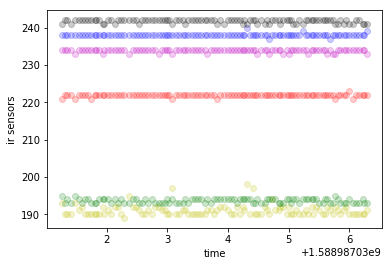

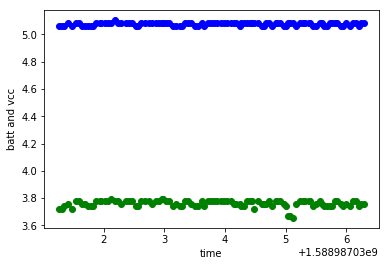

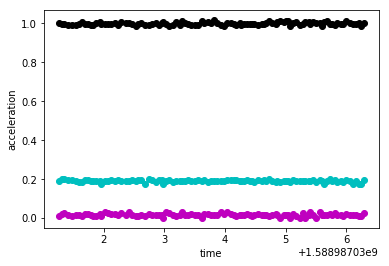

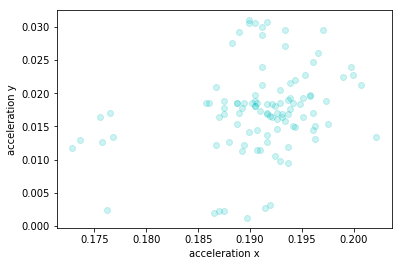

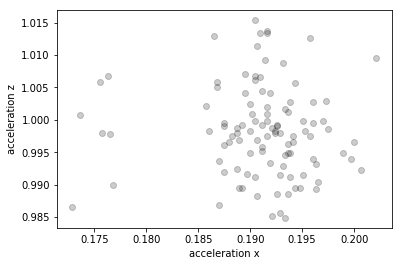

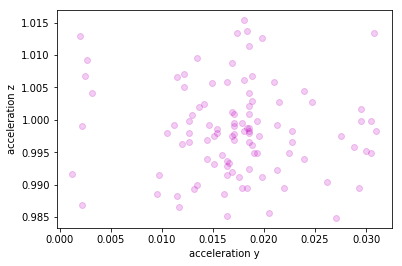

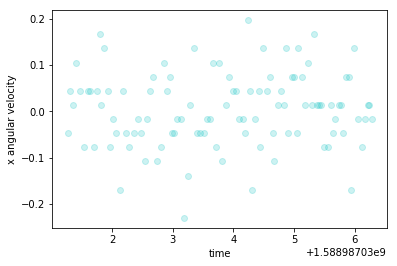

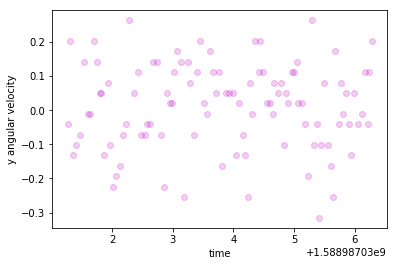

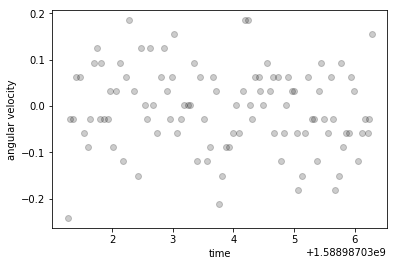

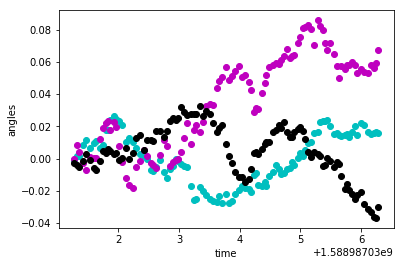

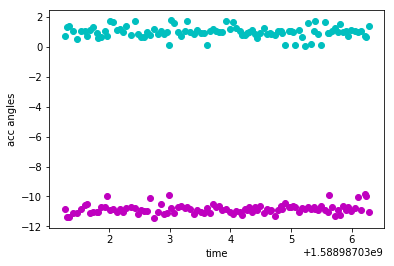

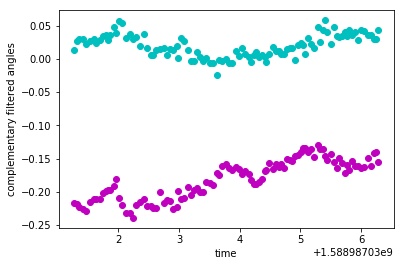

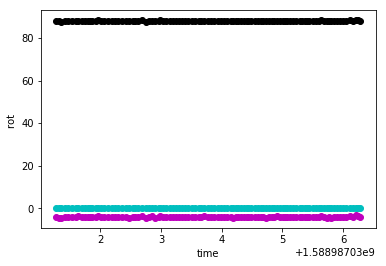

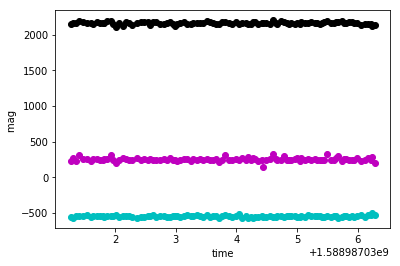

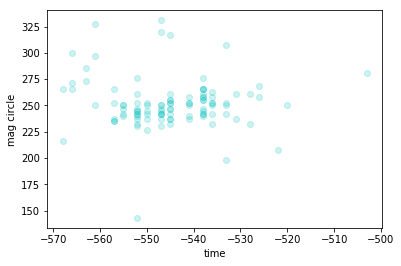

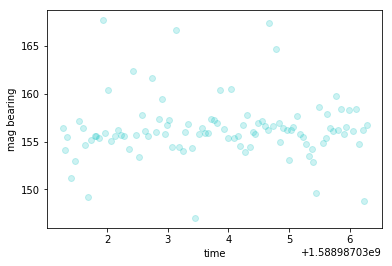

In [5]:
graph_everything()

In [6]:
def stats_info_for_list(data_to_proc,print_values=False):
    elem = np.array(data_to_proc)
    mean = np.mean(elem,axis=0)
    median = np.median(elem,axis=0)
    std_dev = np.std(elem,axis=0)
    q1 = np.percentile(data_to_proc,25,axis=None)
    q3 = np.percentile(data_to_proc,75,axis=None)
    IQR = q3-q1

    if print_values:
        print("Mean ",mean)
        print("Median ",median)
        print("Std Dev ",std_dev)
        print("Q1 ",q1)
        print("Q3 ",q3)
        print("IQR ",IQR)
    return mean,median,std_dev,q1,q3,IQR

def remove_outliers(data_to_proc,n_sigma=6):
    mean,median,std_dev,q1,q3,IQR = stats_info_for_list(data_to_proc)
    IQR_sigma = IQR/1.34896
    th1 = median-IQR_sigma*n_sigma
    th2 = median+IQR_sigma*n_sigma
    #print(th1," ", th2)
    data_processed = []
    
    for data_point in data_to_proc:
        #if the data point is not an outlier
        if data_point < th1:
            print("outlier", data_point)
            data_processed.append(median)
            
        elif data_point > th2:
            print("outlier", data_point)
            data_processed.append(median) 
        else:
            data_processed.append(data_point)
            
    return data_processed

def check_point_outlier(new_val,old_data,n_sigma=6):
    mean,median,std_dev,q1,q3,IQR = stats_info_for_list(old_data)
    IQR_sigma = IQR/1.34896
    th1 = median-IQR_sigma*n_sigma
    th2 = median+IQR_sigma*n_sigma
    #print("thresholds ",th1," ", th2)
    if new_val < th1:
        #print("outlier", new_val)
        return median,th1,th2
    elif new_val > th2:
        #print("outlier", new_val)
        return median,th1,th2
    else:
        return new_val,th1,th2

# #stats_info_for_list(column(15,sensor_list),True)
# yangv = column(15,sensor_list)
# yangv_mod = remove_outliers(yangv,n_sigma=6)

# plt.plot(column(0,sensor_list),yangv_mod,'mo',alpha=0.1)
# plt.ylabel('y angular velocity')
# plt.xlabel('time')
# plt.show()

starting
now beginning
done


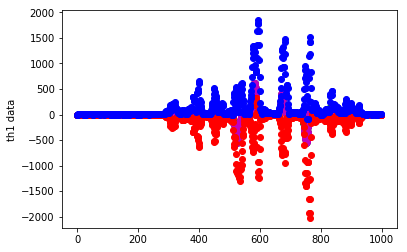

In [18]:
#         angular_speed_x = self.mpu_list[3]
#         angular_speed_y = self.mpu_list[4]
#         angular_speed_z = self.mpu_list[5]

old_data = []
orig_data = []
filt_data = []
th1_list = []
th2_list = []

print("starting")

for i in range(10):
    zumi.update_angles()
    new_val = zumi.mpu_list[4]
    old_data.append(new_val)
    
print("now beginning")
for i in range(1000):
    zumi.update_angles()
    new_val = zumi.mpu_list[4]
    d,th1,th2 = check_point_outlier(new_val,old_data,n_sigma=6)
    th1_list.append(th1)
    th2_list.append(th2)
    old_data.pop(0)
    old_data.append(new_val)
    filt_data.append(d)
    orig_data.append(new_val)

print("done")

plt.plot(orig_data,'go',filt_data,'mo',th1_list,'ro',th2_list,'bo')
plt.ylabel('th1 data')
plt.show()

# plt.plot(th2_list,'mo')
# plt.ylabel('th2 data')
# plt.show()

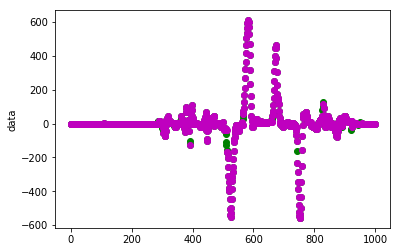

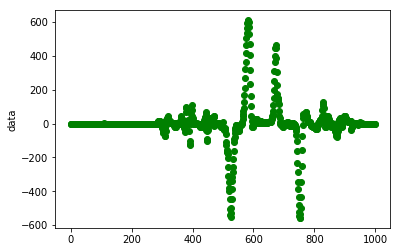

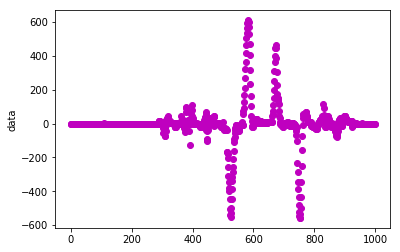

In [19]:
plt.plot(orig_data,'go',filt_data,'mo')
plt.ylabel('data')
plt.show()

plt.plot(orig_data,'go')
plt.ylabel('data')
plt.show()

plt.plot(filt_data,'mo')
plt.ylabel('data')
plt.show()


starting
now beginning
done


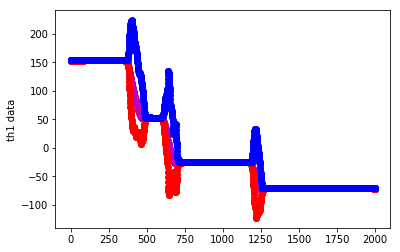

In [9]:
old_data = []
orig_data = []
filt_data = []
th1_list = []
th2_list = []

print("starting")

for i in range(30):
    zumi.update_angles()
    new_val = zumi.angle_list[2]
    old_data.append(new_val)
    
print("now beginning")
for i in range(2000):
    zumi.update_angles()
    new_val = zumi.angle_list[2]
    d,th1,th2 = check_point_outlier(new_val,old_data,n_sigma=6)
    th1_list.append(th1)
    th2_list.append(th2)
    old_data.pop(0)
    old_data.append(new_val)
    filt_data.append(d)
    orig_data.append(new_val)

print("done")


plt.plot(orig_data,'go',filt_data,'mo',th1_list,'ro',th2_list,'bo')
plt.ylabel('th1 data')
plt.show()

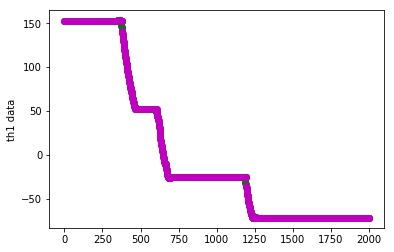

In [10]:
plt.plot(orig_data,'go',filt_data,'mo')
plt.ylabel('th1 data')
plt.show()

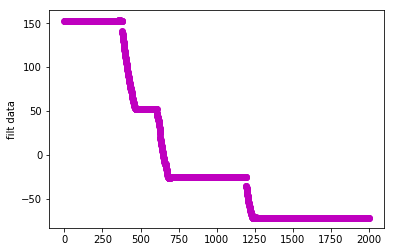

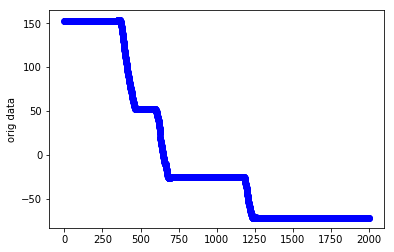

In [12]:
plt.plot(filt_data,'mo')
plt.ylabel('filt data')
plt.show()

plt.plot(orig_data,'bo')
plt.ylabel('orig data')
plt.show()